In [1]:
from PIL import Image
import os
import numpy as np
from scipy.ndimage import median_filter

In [41]:
data_folder = "../grayscale"
files = os.listdir(data_folder)
files

['grayscale5.jpg',
 'grayscale4.jpg',
 'ILSVRC2012_val_00049050.JPEG',
 'grayscale3.jpg',
 'grayscale2.jpg',
 'grayscale1.jpg']

In [3]:
def check_grayscale(im): # todo: handle the case in which there is no mode
    if im.mode == 'L':
        return 0
    elif im.mode == 'RGB':
        imarr = np.asarray(im)
        rgb_channels = imarr.reshape(-1,3).T
        return 0 if (np.diff(rgb_channels, axis=0)==0).all() else 1

In [4]:
def get_color_channels(im):
    return im.mode

In [46]:
im =  Image.open(os.path.join(data_folder, "grayscale1.jpg"))
w, h = im.size

In [47]:
np.asarray(im).shape

(197, 300)

In [6]:
imrgb = im.convert('RGB')

In [7]:
check_grayscale(im)

1

In [8]:
get_color_channels(imrgb)

'RGB'

In [37]:
data_folder = "../hot_pixels"
files = os.listdir(data_folder)

In [38]:
files

['246_0093.jpg',
 'hotpixel1.jpeg',
 'syn_hotpixel.jpg',
 'ILSVRC2012_val_00048696.JPEG']

In [11]:
im = Image.open(os.path.join(data_folder, files[2]))
im.mode

'RGB'

In [12]:
def find_hot_pixels(im):
    imarr = np.asarray(im.convert('L'))
    blurred = median_filter(imarr, size=2, mode='nearest')
    diff = imarr - blurred
    threshold = 10*np.std(diff)
    num_hot_pixels = (np.abs(diff[1:-1,1:-1])>threshold).sum()
    return num_hot_pixels

In [19]:
# sample hot pixel image
imarr = np.full((256, 256), 0)
np.random.seed(0)
x = np.random.choice(256, 10)
y = np.random.choice(256, 10)
imarr[x,y] = 255
noisy_im = Image.fromarray(imarr, mode='L')
noisy_im.save(os.path.join(data_folder, "syn_hotpixel.jpg"))

In [20]:
im = Image.open(os.path.join(data_folder, "syn_hotpixel.jpg"))

In [21]:
find_hot_pixels(im)

22

In [32]:
imarr = np.full((256,256),0)
np.random.seed(0)
x = np.random.choice(256, 100)
y = np.random.choice(256, 100)
imarr[x,y] = np.random.choice(256, 100)

In [33]:
im = Image.fromarray(imarr, mode='L')

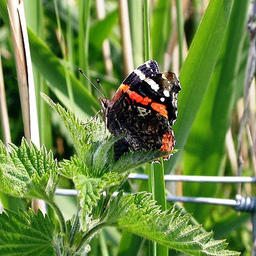

In [39]:
im = Image.open(os.path.join(data_folder, "ILSVRC2012_val_00048696.JPEG"))
im

In [40]:
im.entropy()

9.276090223237201